<a href="https://colab.research.google.com/github/prakhar1535/RAG-chatbot/blob/main/Credit_Underwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.IMPORTING THE LIBRARIES**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# **2. DATA PREPROCCESING**


In [ ]:
dataset=pd.read_csv('credit_risk_dataset.csv')
print(dataset.head())

     person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
1            21           9600                   OWN                5.0   
2            25           9600              MORTGAGE                1.0   
3            23          65500                  RENT                4.0   
4            24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.shape


(32581, 12)

HANDLING THE DUPLICATE DATA

In [ ]:
dataset.duplicated().sum()

165

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(32416, 12)

HANDLING THE MISSING VALUES

In [ ]:
dataset.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


PLOTTING THE MISSING VALUES FIGURES TO FIGURE OUT WHICH CENTRAL TENDENCY TO USE

<Axes: xlabel='loan_int_rate', ylabel='Count'>

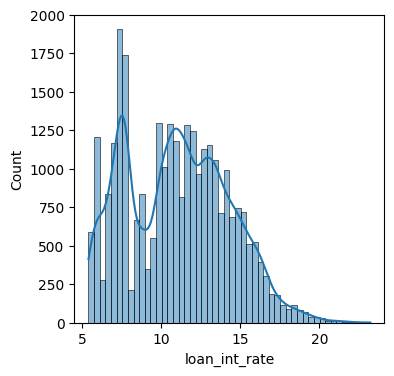

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
sns.histplot(dataset.loan_int_rate,kde=True)

<Axes: xlabel='person_emp_length', ylabel='Count'>

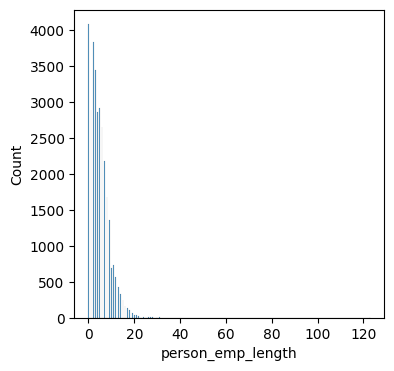

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
sns.histplot(dataset.person_emp_length)

In [ ]:
#will use median as data is right skewed
dataset['loan_int_rate']=dataset['loan_int_rate'].fillna(dataset['loan_int_rate'].median())
dataset['person_emp_length']=dataset['person_emp_length'].fillna(dataset['person_emp_length'].median())

In [ ]:
dataset.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
dataset['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
0,78.13117
1,21.86883


We have to split the number of 0's and 1's in equal proportion in our training and test data.
For this we use stratify=True.

SPLITTING INTO TRAINING AND TEST DATA

In [ ]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(dataset.drop('loan_status',axis=1),dataset['loan_status'],
                                               test_size=0.2,random_state=0,stratify=dataset['loan_status'],
                                               shuffle=True)

In [ ]:
print(X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape)

(25932, 11) (6484, 11) (25932,) (6484,)


In [ ]:
X_TRAIN_PIPE=X_TRAIN.copy()
Y_TRAIN_PIPE=Y_TRAIN.copy()
X_TEST_PIPE=X_TEST.copy()
Y_TEST_PIPE=Y_TEST.copy()

In [ ]:
Y_TRAIN.value_counts(normalize=True)*100


,proportion
loan_status,
0,78.131266
1,21.868734


In [ ]:
Y_TEST.value_counts(normalize=True)*100


,proportion
loan_status,
0,78.130783
1,21.869217


**FEATURE EXTRACTION**

loan_percent_income=loan_amount/person_income

so we can simply drop it.

In [ ]:
X_TRAIN.drop('loan_percent_income',axis=1,inplace=True)
X_TEST.drop('loan_percent_income',axis=1,inplace=True)


Checking for unique values in the column

In [ ]:
for col in dataset.columns:
  print(col,dataset[col].nunique())
  print()
  if (dataset[col].nunique()<10):
    print(dataset[col].value_counts('normalise=True')*100)
    print()

  person_age 58

person_income 4295

person_home_ownership 4

person_home_ownership
RENT        50.524432
MORTGAGE    41.241979
OWN          7.906589
OTHER        0.326999
Name: proportion, dtype: float64

person_emp_length 36

loan_intent 6

loan_intent
EDUCATION            19.777270
MEDICAL              18.638944
VENTURE              17.528381
PERSONAL             16.960760
DEBTCONSOLIDATION    16.007527
HOMEIMPROVEMENT      11.087117
Name: proportion, dtype: float64

loan_grade 7

loan_grade
A    33.017646
B    32.042818
C    19.860563
D    11.167325
E     2.970755
F     0.743460
G     0.197433
Name: proportion, dtype: float64

loan_amnt 753

loan_int_rate 348

loan_status 2

loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64

loan_percent_income 77

cb_person_default_on_file 2

cb_person_default_on_file
N    82.323544
Y    17.676456
Name: proportion, dtype: float64

cb_person_cred_hist_length 29



Diffrentiating Categorical Data and numerical Data

In [ ]:
cat_col=[col for col in X_TRAIN.columns if X_TRAIN[col].dtype=='object']
num_col=[col for col in X_TRAIN.columns if X_TRAIN[col].dtype!='object']
print(cat_col)
print(num_col)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
['  person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']


SCALING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_TRAIN[num_col])


StandardScaler()

In [ ]:
X_TRAIN[num_col]=scalar.transform(X_TRAIN[num_col])
X_TEST[num_col]=scalar.transform(X_TEST[num_col])

In [ ]:
X_TRAIN[num_col].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
21415,0.827121,-0.282597,1.509053,0.061304,-0.331616,0.544526
12916,-0.426367,0.301579,0.051359,-0.333084,0.006007,-0.689366
2938,-0.269681,0.933121,1.266104,-1.042982,0.389078,-0.442587
19114,0.200377,-0.061557,-0.191590,-1.153411,0.785135,0.050970
6057,-0.583053,-0.282597,-0.191590,-0.853676,0.317658,-0.442587


In [ ]:
X_TEST[num_col].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
31162,2.550668,0.222637,2.237900,0.061304,-1.617177,2.271975
17831,-0.583053,-0.440482,-1.163386,0.376815,0.285194,-0.689366
21226,0.827121,0.756289,0.780206,-0.727472,0.265716,0.791305
8789,-0.896425,-0.093134,-0.677488,-0.964105,-0.331616,-0.936144
5717,-0.739739,-0.440482,-0.920437,-0.695921,-1.016599,-0.689366


NOW ENCODING CATEGORICAL DATA INTO NUMERICAL DATA

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in cat_col:
  print(X_TRAIN[col].value_counts())
  print()

person_home_ownership
RENT        13049
MORTGAGE    10746
OWN          2053
OTHER          84
Name: count, dtype: int64

loan_intent
EDUCATION            5137
MEDICAL              4872
VENTURE              4549
PERSONAL             4377
DEBTCONSOLIDATION    4141
HOMEIMPROVEMENT      2856
Name: count, dtype: int64

loan_grade
A    8540
B    8331
C    5161
D    2884
E     779
F     190
G      47
Name: count, dtype: int64

cb_person_default_on_file
N    21366
Y     4566
Name: count, dtype: int64



In [ ]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(X_TRAIN[cat_col])
X_TRAIN_encoded_col=encoder.transform(X_TRAIN[cat_col])
X_TEST_encoded_col=encoder.transform(X_TEST[cat_col])

In [ ]:
X_TRAIN_encoded_dataset=pd.DataFrame(X_TRAIN_encoded_col,columns=encoder.get_feature_names_out(cat_col),index=X_TRAIN.index)

In [ ]:
X_TRAIN_encoded_dataset.shape


(25932, 19)

In [ ]:
X_TRAIN.shape

(25932, 10)

In [ ]:
X_TEST_encoded_dataset=pd.DataFrame(X_TEST_encoded_col,columns=encoder.get_feature_names_out(cat_col),index=X_TEST.index)

ALL SET! NOW LETS CONCATENATE

In [ ]:
X_TRAIN=pd.concat([X_TRAIN,X_TRAIN_encoded_dataset],axis=1)
X_TEST=pd.concat([X_TEST,X_TEST_encoded_dataset],axis=1)

NOW WE HAVE TO DROP CAT_COL

In [ ]:
X_TRAIN.drop(cat_col,axis=1,inplace=True)
X_TEST.drop(cat_col,axis=1,inplace=True)


In [ ]:
X_TRAIN.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21415,0.827121,-0.282597,1.509053,0.061304,-0.331616,0.544526,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12916,-0.426367,0.301579,0.051359,-0.333084,0.006007,-0.689366,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2938,-0.269681,0.933121,1.266104,-1.042982,0.389078,-0.442587,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19114,0.200377,-0.061557,-0.191590,-1.153411,0.785135,0.050970,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6057,-0.583053,-0.282597,-0.191590,-0.853676,0.317658,-0.442587,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_TEST.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31162,2.550668,0.222637,2.237900,0.061304,-1.617177,2.271975,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17831,-0.583053,-0.440482,-1.163386,0.376815,0.285194,-0.689366,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21226,0.827121,0.756289,0.780206,-0.727472,0.265716,0.791305,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8789,-0.896425,-0.093134,-0.677488,-0.964105,-0.331616,-0.936144,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5717,-0.739739,-0.440482,-0.920437,-0.695921,-1.016599,-0.689366,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


YEAHHHHHHHHHHH! ALL SET! NOW WE ARE GOOD TO TRAIN OUR MODEL

# **TRAINING THE MODEL**

1. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr_model=LogisticRegression()
lr_model.fit(X_TRAIN,Y_TRAIN)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predication=lr_model.predict(X_TEST)
report=classification_report(Y_TEST,lr_predication)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5066
           1       0.77      0.45      0.57      1418

    accuracy                           0.85      6484
   macro avg       0.82      0.71      0.74      6484
weighted avg       0.84      0.85      0.84      6484



In [ ]:
lr_model.score(X_TEST,Y_TEST)

0.850709438618137

2.SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_TRAIN,Y_TRAIN)

SVC()

In [ ]:
svm_predication=svm_model.predict(X_TEST)
report=classification_report(Y_TEST,svm_predication)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5066
           1       0.93      0.58      0.71      1418

    accuracy                           0.90      6484
   macro avg       0.91      0.78      0.83      6484
weighted avg       0.90      0.90      0.89      6484



In [ ]:
svm_model.score(X_TEST,Y_TEST)

0.8985194324491055

3.RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_model=RandomForestClassifier(random_state=0)
Random_model.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(random_state=0)

In [ ]:
rm_predication=Random_model.predict(X_TEST)
report=classification_report(Y_TEST,rm_predication)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.69      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.93      0.84      0.88      6484
weighted avg       0.92      0.92      0.92      6484



In [ ]:
Random_model.score(X_TEST,Y_TEST)


0.9231955582973473

4.GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(X_TRAIN,Y_TRAIN)



GradientBoostingClassifier()

In [ ]:
gb_predication=gb_model.predict(X_TEST)
report=classification_report(Y_TEST,gb_predication)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5066
           1       0.91      0.66      0.77      1418

    accuracy                           0.91      6484
   macro avg       0.91      0.82      0.86      6484
weighted avg       0.91      0.91      0.91      6484



In [ ]:
gb_model.score(X_TEST,Y_TEST)


0.9117828500925355

In [ ]:
!pip install scikit-learn==1.2.2

5. XGboost

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_TRAIN,Y_TRAIN)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgboost_predication=xgb_model.predict(X_TEST)
report=classification_report(Y_TEST,xgboost_predication)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.94      0.73      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.93      0.86      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [ ]:
xgb_model.score(X_TEST,Y_TEST)

0.9299814929056138

In [ ]:
!pip install catboost

6.Catboost

In [ ]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier()
cat_model.fit(X_TRAIN,Y_TRAIN)

Learning rate set to 0.041366
0:	learn: 0.6621704	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.6315147	total: 144ms	remaining: 1m 11s
2:	learn: 0.6057290	total: 210ms	remaining: 1m 9s
3:	learn: 0.5821358	total: 261ms	remaining: 1m 5s
4:	learn: 0.5591566	total: 308ms	remaining: 1m 1s
5:	learn: 0.5397414	total: 338ms	remaining: 55.9s
6:	learn: 0.5214766	total: 364ms	remaining: 51.6s
7:	learn: 0.5051562	total: 384ms	remaining: 47.6s
8:	learn: 0.4923644	total: 394ms	remaining: 43.3s
9:	learn: 0.4826454	total: 415ms	remaining: 41.1s
10:	learn: 0.4699444	total: 426ms	remaining: 38.3s
11:	learn: 0.4595487	total: 436ms	remaining: 35.9s
12:	learn: 0.4507418	total: 445ms	remaining: 33.8s
13:	learn: 0.4395920	total: 456ms	remaining: 32.1s
14:	learn: 0.4291351	total: 466ms	remaining: 30.6s
15:	learn: 0.4209084	total: 494ms	remaining: 30.4s
16:	learn: 0.4135786	total: 509ms	remaining: 29.4s
17:	learn: 0.4052891	total: 519ms	remaining: 28.3s
18:	learn: 0.3993556	total: 534ms	remaining: 27.6s
19:	lear

In [ ]:
cat_predication=cat_model.predict(X_TEST)
report=classification_report(Y_TEST,cat_predication)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.95      0.72      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.94      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [ ]:
cat_model.score(X_TEST,Y_TEST)

0.9307526218383714

7.LightGBM

In [ ]:
pip install dask

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_TRAIN,Y_TRAIN)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5671, number of negative: 20261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 25932, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218687 -> initscore=-1.273332
[LightGBM] [Info] Start training from score -1.273332


LGBMClassifier()

In [ ]:
lgbm_predication=lgbm_model.predict(X_TEST)
report=classification_report(Y_TEST,lgbm_predication)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5066
           1       0.96      0.71      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.94      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [ ]:
lgbm_model.score(X_TEST,Y_TEST)

0.9305983960518198

## **PIPELINING**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
num_pipe=Pipeline([
    ('imputer',IterativeImputer()),
    ('scaler',StandardScaler())
])

In [ ]:
cat_pipe=Pipeline([
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [ ]:
preprocessor=ColumnTransformer([
    ('num',num_pipe,num_col),
    ('cat',cat_pipe,cat_col)
])

In [ ]:
pipeline_model=Pipeline([
    ('preprocessor',preprocessor)
])

In [ ]:
pipeline_model



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['  person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])]))])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
models={
    "Logistic Regression":LogisticRegression(random_state=42),
    "SVC" :SVC(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42),
    "LightGBM":LGBMClassifier(random_state=42),
    "CatBoost":CatBoostClassifier(silent=True,random_state=42)
}


In [ ]:
for name , model in models.items():
  pipeline=Pipeline([
      ('preprocessor',preprocessor),
      ('model',model)
  ])

  cv_scores= cross_val_score(pipeline ,X_TRAIN_PIPE,Y_TRAIN_PIPE,cv=5 , scoring ="f1",n_jobs=-1)
  print(f"{name} : {cv_scores.mean()}")


Logistic Regression : 0.5684605598324732
SVC : 0.7042116444133397
Random Forest : 0.7993556212485318
Gradient Boosting : 0.774063204515095
XGBoost : 0.8227907505451733
LightGBM : 0.8196812365291525


# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:

models_grid = {
    'LGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1),
        'params': {
            'preprocessor__num__imputation__estimator': [LinearRegression(), KNeighborsRegressor()],
            'model__n_estimators': [300, 500],
            'model__learning_rate': [0.01, 0.05],
            'model__boosting_type': ['gbdt', 'dart'],
            'model__num_leaves': [31, 50],
            'model__max_depth': [7, 10],
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True, random_state=0),
        'params': {
            'preprocessor__num__imputation__estimator': [LinearRegression(), KNeighborsRegressor()],
            'model__iterations': [200, 300],
            'model__learning_rate': [0.05, 0.1],
            'model__depth': [6, 8],
            'model__l2_leaf_reg': [1, 3],
            'model__boosting_type': ['Ordered'],
        }
    }
}

In [ ]:
scores=[]
for name, model_info in models_grid.items():
    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('model', model_info['model'])
  ])
    rsc =  RandomizedSearchCV(estimator=pipeline , param_distributions=model_info['params'], scoring="f1" , n_jobs=-1 , verbose=3 , n_iter= 5 , random_state=0)

    rsc.fit(X_TRAIN_PIPE,Y_TRAIN_PIPE)
    scores.append({
        'model':name,
        'best_score':rsc.best_score_,
        'best_params':rsc.best_params_
    })
